# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.310683e+01     1.638177e+01
 * time: 0.003787994384765625
     1     6.401228e+01     1.044169e+01
 * time: 0.01084589958190918
     2     5.767085e+01     1.256407e+01
 * time: 0.026587963104248047
     3     4.271283e+01     9.541700e+00
 * time: 0.11592388153076172
     4     3.335081e+01     9.060953e+00
 * time: 0.13741111755371094
     5     1.455958e+01     2.806386e+00
 * time: 0.15835309028625488
     6     1.002814e+01     2.696211e+00
 * time: 0.1738910675048828
     7     8.957029e+00     2.274797e+00
 * time: 0.18900394439697266
     8     8.074164e+00     2.577184e+00
 * time: 0.2045750617980957
     9     7.479101e+00     2.378800e+00
 * time: 0.21965694427490234
    10     6.805742e+00     1.470559e+00
 * time: 0.27963709831237793
    11     6.417980e+00     1.007825e+00
 * time: 0.2952098846435547
    12     6.173857e+00     1.604402e+00
 * time: 0.3078279495239258
    13     5.973799e+00     9.873495e-01
 * time: 0

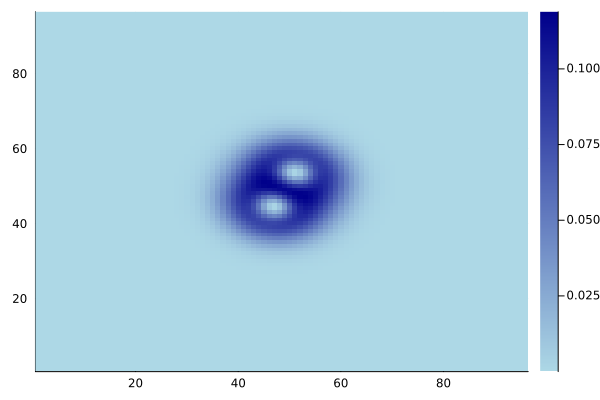

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)